# Explicit forward time central space scheme 

The below code solves the turkey question

$$ \left\{ \begin{aligned} \frac{\partial w}{\partial t} &= D \frac{1}{r^2}\partial (r^2\frac{\partial w}{\partial r}) \\ w(r, 0) &= 0 \\ w(0.1, t) &= 150\end{aligned} \right. $$

using an explicit forward time central-space scheme.

In [1]:
%load_ext autoreload
%autoreload 2

import sys, os
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp
import scipy.sparse as sps
import scipy.sparse.linalg as LAS

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

h =  0.005
D k / h2 =  0.19999999999999998
yo im cooked
5.597222222222222 hours


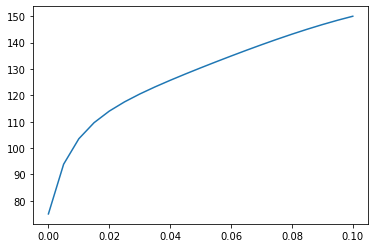

In [17]:
# Setup basic domain
R = 0.1
D = 1e-7

N = 20     # Number of lattice points
h = R / N  # Spatial step size

# Create the x-grid
x = np.linspace(0, R, N+1)

# Setup final solution time + time-step
tf = 1000000
k  = 50
n_steps = round(tf / k)

# Print the stability condition; Recall that this ratio must be less than 1/2
print('h = ', h)
print('D k / h2 = ', (D * k / h**2))

# Create initial condition
w  = np.zeros(N + 1)

# Set initial condition
w[N] = 150

for j in range(n_steps):
    u = w
    for i in range(1, N+1):
        d1 = (D * k / h**2) * np.ones(N)
        d2 = ((D * k / h**2) * (-2 - 2 / i) + 1)  * np.ones(N+1)
        d3 = ((D * k / h**2) * (1 + 2/i)) * np.ones(N)
        A = sps.diags((d1, d2, d3), offsets=(-1, 0, 1))
        w[i-1] = (A.dot(u))[i-1]
    
    if w[0] >= 75:
        print("yo im cooked")
        print((j*k/60)/60, "hours")
        break
        
    # enforce BC
    w[N] = 150
    w[0] = w[1]
    
plt.plot(x, w)

h =  0.005
D k / h2 =  0.19999999999999998
yo im cooked kinda
287.5
yo im cooked for real
55.0


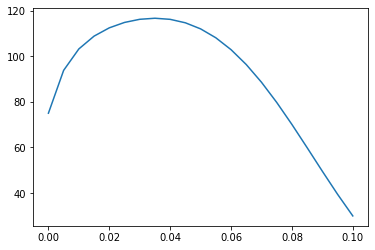

In [15]:
# Setup basic domain
R = 0.1
D = 1e-7

N = 20     # Number of lattice points
h = R / N  # Spatial step size

# Create the x-grid
x = np.linspace(0, R, N+1)

# Setup final solution time + time-step
tf = 1000000
k  = 50
n_steps = round(tf / k)

# Print the stability condition; Recall that this ratio must be less than 1/2
print('h = ', h)
print('D k / h2 = ', (D * k / h**2))

# Create initial condition
w  = np.zeros(N + 1)

# Set initial condition
w[N] = 150

for j in range(n_steps):
    u = w
    for i in range(1, N+1):
        d1 = (D * k / h**2) * np.ones(N)
        d2 = ((D * k / h**2) * (-2 - 2 / i) + 1)  * np.ones(N+1)
        d3 = ((D * k / h**2) * (1 + 2/i)) * np.ones(N)
        A = sps.diags((d1, d2, d3), offsets=(-1, 0, 1))
        w[i-1] = (A.dot(u))[i-1]
    if w[0] >= 68.7:
        print("yo im cooked kinda")
        print((j*k)/60)
        break
        
    # enforce BC
    w[N] = 150
    w[0] = w[1]
    
w[N] = 30

for j in range(n_steps):
    u = w
    for i in range(1, N+1):
        d1 = (D * k / h**2) * np.ones(N)
        d2 = ((D * k / h**2) * (-2 - 2 / i) + 1)  * np.ones(N+1)
        d3 = ((D * k / h**2) * (1 + 2/i)) * np.ones(N)
        A = sps.diags((d1, d2, d3), offsets=(-1, 0, 1))
        w[i-1] = (A.dot(u))[i-1]
    if w[0] >= 75:
        print("yo im cooked for real")
        print((j*k)/60)
        break
    if w[0] <= 60:
        print("uki, what have you done to me?")
        break
        
    # enforce BC
    w[N] = 30
    w[0] = w[1]

plt.plot(x, w)